<a href="https://colab.research.google.com/github/fpiedra47/clustering/blob/main/agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/week8/cust_seg.csv")
#df.drop(columns = 'Unnamed = 0', inplace = True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.dropna(inplace = True)

In [40]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

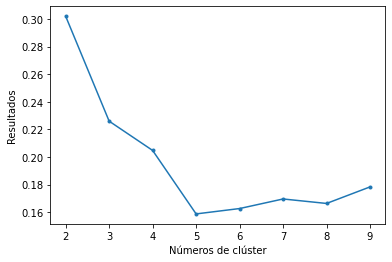

In [ ]:
# Visualiza diferentes puntuaciones de silueta
# Guardar las puntuaciones de silueta para varios números de clúster en la lista
#from sklearn.metrics import silhouette_score
#Valor de la silueta para KMeans
#En algoritmos como KMeans, una de las cosas que podemos hacer para determinar el mejor número de clústeres es observar la puntuación de silueta de modelos con diferentes números de clústeres.
silhouette_scores = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualizar resultados
plt.plot(range(2, 10), silhouette_scores, marker = '.')
plt.xlabel('Números de clúster')
plt.ylabel('Resultados');

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)


In [ ]:
silhouette_score(scaled_df, kmeans.labels_)

0.30201873044004307

In [ ]:
# Consultar la puntuación de silueta de agrupación jerárquica
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#Valor de la silueta para agrupación jerárquica
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

0.26923835524710166

In [36]:
# Crear una instancia y ajustar la agrupación en clústeres: esto se hace en un solo paso para DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)
#silhouette_score(scaled_df, dbs.labels_)


In [38]:
df['db'] = dbs.labels_

In [42]:
#silhouette_score(scaled_df, df['db'])

**¿Qué algoritmo de agrupación en clústeres es mejor para estos datos y por qué?** El mejor algoritmo de agrupación es KNN 